# Convolutional Neural Networks
## for image classification

Practicing of neural network models, with Keras:
* Convolutional Neural Networks (CNN)
* Image classification

Ricardo Almeida, using [Fashion MNIST](https://keras.io/api/datasets/fashion_mnist/) dataset

In [1]:
# Additional requirements
# conda install pydot  

In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'

In [3]:
from keras import Input
from keras.datasets import fashion_mnist
from keras.layers import BatchNormalization, Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from keras.models import Sequential
from keras.optimizers import Adam, SGD, RMSprop
from keras.regularizers import l1, l2
from keras.utils import plot_model, to_categorical

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
def plot_history(train_hist):
    pd.DataFrame(train_hist).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
    plt.show()

In [5]:
def plot_value_array(predictions_array, predicted_label, true_label):
    plt.figure(figsize=(3, 3))
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot=plt.bar(range(10), predictions_array, color='gray')
    plt.ylim([0,1])
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')
    plt.show()

In [6]:
def plot_greyscale(image):
    plt.figure(figsize=(3, 3))
    plt.axis('off')
    plt.imshow(image, cmap='gray')
    plt.show()

## Small images dataset

#### Loading dataset

In [7]:
# Load the data, already split between train and test sets
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [8]:
print(f"Train size: {X_train.shape[0]}")
print(f"Test size:  {X_test.shape[0]}")

Train size: 60000
Test size:  10000


In [9]:
num_classes = len(np.unique(y_train))

In [10]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [11]:
class_names =['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print(class_names)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']



Ankle boot:


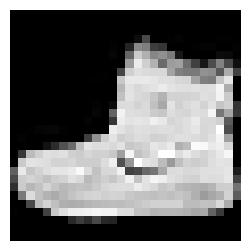


T-shirt/top:


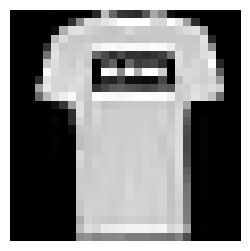


T-shirt/top:


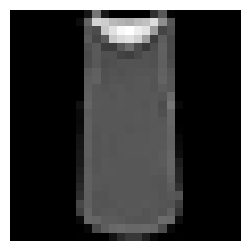


Dress:


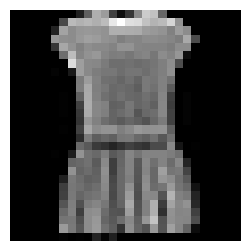


T-shirt/top:


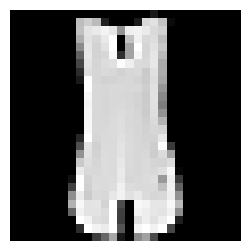


Pullover:


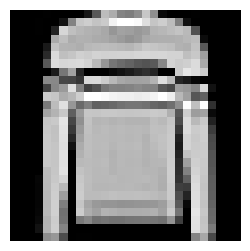

In [12]:
for i in range(6):
    print(f"\n{class_names[y_train[i]]}:")
    plot_greyscale(X_train[i])

#### Pre-processing

In [13]:
# Scale images to the [0, 1] range
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

#### Model creation / fitting

Create Keras model

In [1]:
# the shape of each input (image)
input_shape = (28, 28, 1)

In [27]:
### Create a model, based on the CNN architecture to classify the clothes images in terms of the 10 types.
### Your model should include:
###  - 2 convolution layers, with a 4x4 and 3x3 kernels respectively, and stride of 1
###  - no padding
###  - 2 pooling layers (Max), with a 2x2 kernels
###  - Dropout regularization disabling half the units, before the dense output layer

### YOUR CODE HERE:

from keras.layers import BatchNormalization, Conv2D, Dense, Dropout, Flatten, MaxPooling2D

model = Sequential([
    Input(shape=input_shape),
    # ...
    # ...
    ])

Compile and build the Keras model

In [28]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
model.summary()

In [ ]:
#plot_model(model, show_shapes=True)

Fit the model

In [ ]:
epochs = 8
batch_size = 128

trained = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.3)

In [ ]:
plot_history(trained.history)

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print(f"Test loss: {score[0]:.3f}")
print(f"Test accuracy: {score[1]:.3f}")

#### Check some examples

In [ ]:
# the index of the sample image we want to score and check (from the Test set)
SAMPLE_INDEX = 4

In [ ]:
my_image = X_test[SAMPLE_INDEX]

predictions = model.predict(np.array([my_image]))
my_prediction = predictions[0]

# probability
pred_class = np.argmax(my_prediction)
pred_class_name = class_names[pred_class]

# class
pred_probability = my_prediction[pred_class]

plot_greyscale(my_image)

plot_value_array(my_prediction, pred_class, y_test[SAMPLE_INDEX])
print(f"Prediction: this image is a '{pred_class_name}', with {100 * pred_probability:.2f}% probability\n")

In [ ]:
### Is this prediction correct?
### Complete the code in order to get the actual classification (label) of this SAMPLE_INDEX sample

### YOUR CODE HERE:

actual_class = "get class" # ...

print(f"Actual: this image is a '{actual_class}'")